In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# importing data 
path = 'C:/Users/amuly/Gun Violence/'

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gun_cleaned.csv'))

In [8]:
df.shape

(239677, 19)

In [9]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female
1,1,460726,2013-01-01,California,Hawthorne,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male
2,2,478855,2013-01-01,Ohio,Lorain,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male
3,3,478925,2013-01-05,Colorado,Aurora,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female


In [10]:
df = df.drop(columns=["Unnamed: 0"])

In [11]:
# Select only the necessary columns for k-means (only numerical) and put them in a list called columns
columns=['n_killed','n_injured','n_guns_involved','incident_id']
df_sub= df[columns]

In [13]:
#add extra column n_casualities
df_sub.loc[:,'n_casualities'] = df_sub['n_injured'] + df_sub['n_killed']

In [14]:
df_sub.head()

,n_killed,n_injured,n_guns_involved,incident_id,n_casualities
0,0,4,NaN,461105,4
1,1,3,NaN,460726,4
2,1,3,2.0,478855,4
3,4,0,NaN,478925,4
4,2,2,2.0,478959,4


In [15]:
df_sub.isnull().sum()

n_killed               0
n_injured              0
n_guns_involved    99451
incident_id            0
n_casualities          0
dtype: int64

In [16]:
df_dup=df_sub.duplicated()

In [17]:
df_dup.shape

(239677,)

In [18]:
missing_rows = df_sub[df_sub.isnull().any(axis=1)]
print(missing_rows)

        n_killed  n_injured  n_guns_involved  incident_id  n_casualities
0              0          4              NaN       461105              4
1              1          3              NaN       460726              4
3              4          0              NaN       478925              4
5              4          0              NaN       478948              4
7              0          5              NaN       479374              5
...          ...        ...              ...          ...            ...
237054         0          0              NaN      1070250              0
237457         0          0              NaN      1072086              0
238524         0          0              NaN      1079676              0
238940         0          0              NaN      1078257              0
239403         0          0              NaN      1080912              0

[99451 rows x 5 columns]


In [19]:
df_sub = df_sub.drop("n_casualities", axis=0, errors="ignore")

In [20]:
missing_rows = df_sub[df_sub.isnull().any(axis=1)]
print(missing_rows)

        n_killed  n_injured  n_guns_involved  incident_id  n_casualities
0              0          4              NaN       461105              4
1              1          3              NaN       460726              4
3              4          0              NaN       478925              4
5              4          0              NaN       478948              4
7              0          5              NaN       479374              5
...          ...        ...              ...          ...            ...
237054         0          0              NaN      1070250              0
237457         0          0              NaN      1072086              0
238524         0          0              NaN      1079676              0
238940         0          0              NaN      1078257              0
239403         0          0              NaN      1080912              0

[99451 rows x 5 columns]


In [21]:
df_sub.isnull().sum()

n_killed               0
n_injured              0
n_guns_involved    99451
incident_id            0
n_casualities          0
dtype: int64

In [22]:
# Changing NaN values with -1 to conduct an analysis
df_sub["n_guns_involved"] = df_sub["n_guns_involved"].fillna(-1)

In [23]:
df_sub.isnull().sum()

n_killed           0
n_injured          0
n_guns_involved    0
incident_id        0
n_casualities      0
dtype: int64

### Elbow Technique

In [24]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [26]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2.059402262206938e+16,
 -5016126161279564.0,
 -2239563830523856.2,
 -1237670390028685.2,
 -760607492132820.8,
 -507802206900851.5,
 -373696484003803.75,
 -289451722117660.06,
 -233885943511933.2]

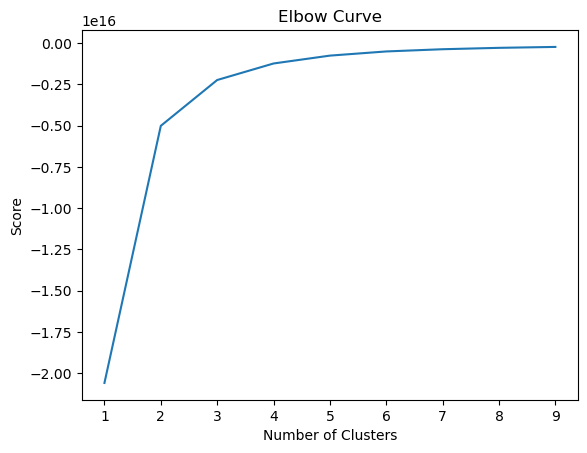

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In this example, after three on the x-axis, the curve straightens out. This means that the optimal count for your clusters is three

#### k means clustering

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [29]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

KMeans(n_clusters=3)

In [30]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

In [31]:
df_sub.head()

,n_killed,n_injured,n_guns_involved,incident_id,n_casualities,clusters
0,0,4,-1.0,461105,4,2
1,1,3,-1.0,460726,4,2
2,1,3,2.0,478855,4,2
3,4,0,-1.0,478925,4,2
4,2,2,2.0,478959,4,2


In [32]:
df_sub['clusters'].value_counts()

clusters
0    81633
1    79162
2    78882
Name: count, dtype: int64

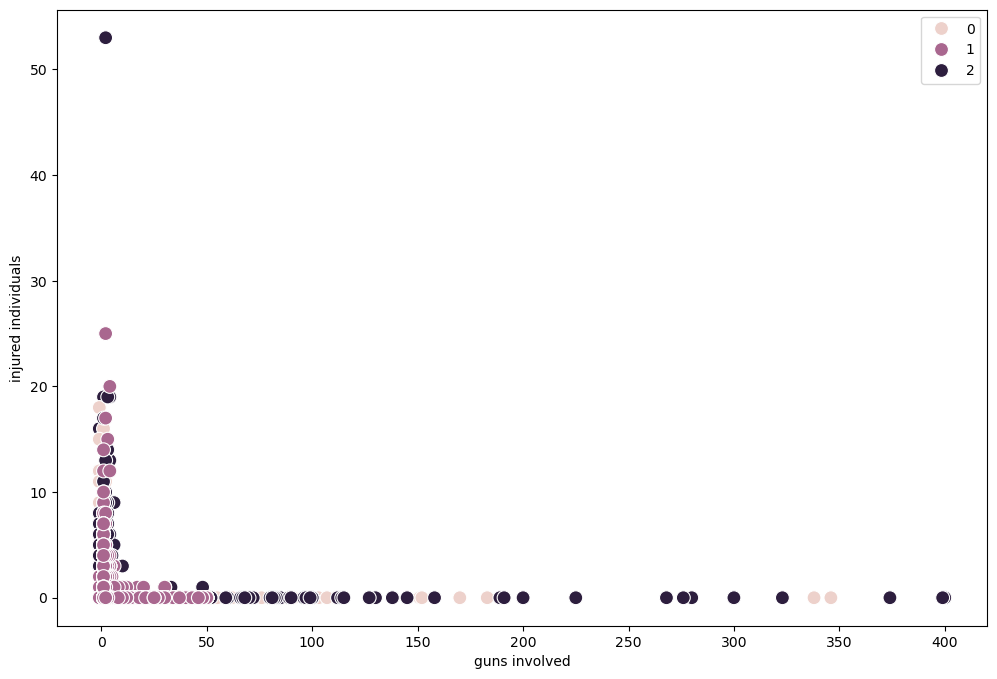

In [33]:
# Plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['n_guns_involved'], y=df_sub['n_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('guns involved') # Label x-axis.
plt.ylabel('injured individuals') # Label y-axis.
plt.show()

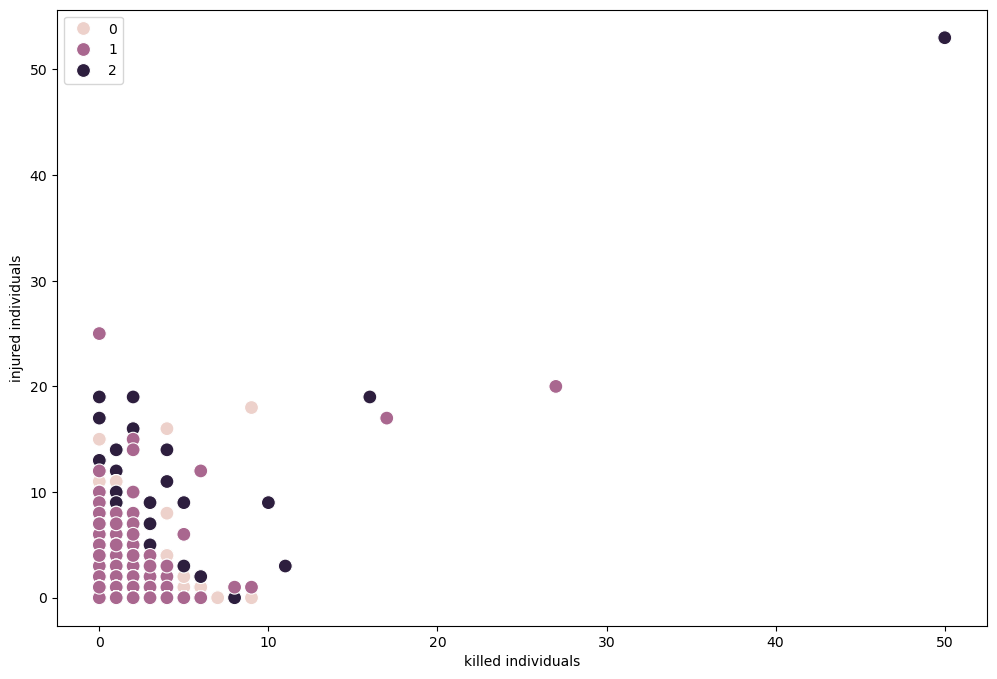

In [34]:
# Plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['n_killed'], y=df_sub['n_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('killed individuals') # Label x-axis.
plt.ylabel('injured individuals') # Label y-axis.
plt.show()

#### The clusters mainly separate low-casualty events from extreme outliers with high numbers of guns or victims. This makes sense, as most incidents are small-scale while a few mass shootings dominate the extremes. However, the overlap in the dense region suggests that K-Means may struggle to distinguish subtle differences and further feature engineering might be needed.  

In [35]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [36]:
df_sub.groupby('cluster').agg({'n_injured':['mean', 'median'], 
                         'n_killed':['mean', 'median'], 
                         'n_guns_involved':['mean', 'median'],
                          'n_casualities':['mean', 'median']})

n_injured         n_killed        n_guns_involved         \
                 mean median      mean median            mean median   
cluster                                                                
dark purple  0.525836    0.0  0.257220    0.0        0.417091    1.0   
pink         0.473448    0.0  0.247645    0.0       -0.480186   -1.0   
purple       0.483490    0.0  0.252166    0.0        1.254377    1.0   

            n_casualities         
                     mean median  
cluster                           
dark purple      0.783056    1.0  
pink             0.721093    1.0  
purple           0.735656    1.0

#### The clusters mainly represent small-scale incidents with low casualties, as both the pink and purple clusters show very similar averages (around 1 gun and less than 1 casualty). The dark purple cluster, however, is dominated by cases with missing gun information (coded as -1), which indicates that data quality issues are influencing the clustering. This suggests that further feature engineering or different handling of missing values would be needed for more meaningful clusters.


#### Q11
These results could be useful as a foundation for feature engineering and data quality assessment in future steps of the analytics pipeline. The identification of clusters dominated by missing values highlights the need for improved data handling strategies, while the grouping of small-scale incidents could guide the development of risk categories.


In [37]:
df_sub.to_csv(os.path.join(path,'02 Data','Prepared Data', 'gun_clusters.csv'))